In [52]:
import plotly.graph_objects as go
import pandas as pd

In [53]:
import pandas as pd
import os
os.chdir(r"C:\Users\venka\Downloads")
Final_DF=pd.read_csv('IMDB_Final.csv')
Final_DF.shape

(1421, 11)

In [54]:
Final_DF.head()

,Title,ReleaseYear,Genre,Duration,Certificate,IMDB_Rating,Votes,GrossIncome,Metascore_Value,Metascore_Key,Plot
0,goodfellas,1990,"Biography, Crime, Drama",146 min,R,8.7,961282,"46,836,394",90.0,Favorable,"In 1955, Henry Hill works for Paul ""Paulie"" Ci..."
1,home alone,1990,"Comedy, Family",103 min,PG,7.6,442270,"285,761,243",63.0,Favorable,The McCallister family is preparing to spend C...
2,edward scissorhands,1990,"Drama, Fantasy, Romance",105 min,PG-13,7.9,429128,"56,362,352",74.0,Favorable,An elderly woman tells her granddaughter the s...
3,back to the future part iii,1990,"Adventure, Comedy, Sci-Fi",118 min,PG,7.4,380294,"87,727,583",55.0,Mixed,"On November 12, 1955, Marty McFly discovers th..."
4,the godfather: part iii,1990,"Crime, Drama",162 min,R,7.6,339644,"66,666,062",60.0,Mixed,NaN


In [55]:
Model_DF=Final_DF[['Title','Plot','ReleaseYear','IMDB_Rating','Metascore_Value','Metascore_Key','Genre']]
Model_DF.head()

,Title,Plot,ReleaseYear,IMDB_Rating,Metascore_Value,Metascore_Key,Genre
0,goodfellas,"In 1955, Henry Hill works for Paul ""Paulie"" Ci...",1990,8.7,90.0,Favorable,"Biography, Crime, Drama"
1,home alone,The McCallister family is preparing to spend C...,1990,7.6,63.0,Favorable,"Comedy, Family"
2,edward scissorhands,An elderly woman tells her granddaughter the s...,1990,7.9,74.0,Favorable,"Drama, Fantasy, Romance"
3,back to the future part iii,"On November 12, 1955, Marty McFly discovers th...",1990,7.4,55.0,Mixed,"Adventure, Comedy, Sci-Fi"
4,the godfather: part iii,NaN,1990,7.6,60.0,Mixed,"Crime, Drama"


In [56]:
Model_DF.columns

Index(['Title', 'Plot', 'ReleaseYear', 'IMDB_Rating', 'Metascore_Value',
       'Metascore_Key', 'Genre'],
      dtype='object')

In [57]:
Model_DF.ReleaseYear.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [58]:
Model_DF.dtypes

Title               object
Plot                object
ReleaseYear          int64
IMDB_Rating        float64
Metascore_Value    float64
Metascore_Key       object
Genre               object
dtype: object

In [59]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [60]:
#Splitting of Genres to create additional rows
Model_DF_Temp = Model_DF.drop('Genre', axis=1).join(
  Model_DF['Genre'].str.split(',', expand=True).stack().reset_index(level=1,drop=True).rename('Genre'))
Model_DF_Temp.head()

,Title,Plot,ReleaseYear,IMDB_Rating,Metascore_Value,Metascore_Key,Genre
0,goodfellas,"In 1955, Henry Hill works for Paul ""Paulie"" Ci...",1990,8.7,90.0,Favorable,Biography
0,goodfellas,"In 1955, Henry Hill works for Paul ""Paulie"" Ci...",1990,8.7,90.0,Favorable,Crime
0,goodfellas,"In 1955, Henry Hill works for Paul ""Paulie"" Ci...",1990,8.7,90.0,Favorable,Drama
1,home alone,The McCallister family is preparing to spend C...,1990,7.6,63.0,Favorable,Comedy
1,home alone,The McCallister family is preparing to spend C...,1990,7.6,63.0,Favorable,Family


In [61]:
#Plotting Number Of Movies Released Every Year By Genre
fig = px.bar(Model_DF_Temp, x='ReleaseYear',y='Genre',color='Genre')
fig.update_layout(title_text='Movie Count by Genre')
fig.show()

In [62]:
#Plotting The Critic Ratings By Genre
Model_DF2 = Model_DF_Temp.groupby('Genre')['IMDB_Rating'].mean()
Model_DF2=Model_DF2.reset_index()
fig = px.bar(Model_DF2, x='Genre', y='IMDB_Rating',color='IMDB_Rating')
fig.update_layout(title_text='Critic Ratings by Genre')
fig.show()

In [63]:
#Plotting the Metascore By Genre and Metascore Key
Model_DF5 = Model_DF_Temp.groupby(['Genre','Metascore_Key'])['Metascore_Value'].mean()
Model_DF5=Model_DF5.reset_index()
fig = px.line(Model_DF5, x='Genre', y='Metascore_Value',color='Metascore_Key')
fig.update_layout(title_text='Audience Ratings by Genre')
fig.show()

In [66]:
#Plotting The Critics Rating By Year
Model_DF4 = Model_DF_Temp.groupby('ReleaseYear')['IMDB_Rating'].mean()
Model_DF4=Model_DF4.reset_index()
fig = px.line(Model_DF4, x='ReleaseYear', y='IMDB_Rating')
fig.update_layout(title_text='Movie Quality By Year')
fig.show()

In [64]:
#Plotting The Metascore Ratings By Year
Model_DF3 = Model_DF_Temp.groupby('ReleaseYear')['Metascore_Value'].mean()
Model_DF3=Model_DF3.reset_index()
fig = px.line(Model_DF3, x='ReleaseYear', y='Metascore_Value')
fig.update_layout(title_text='Audience Rating By Year')
fig.show()

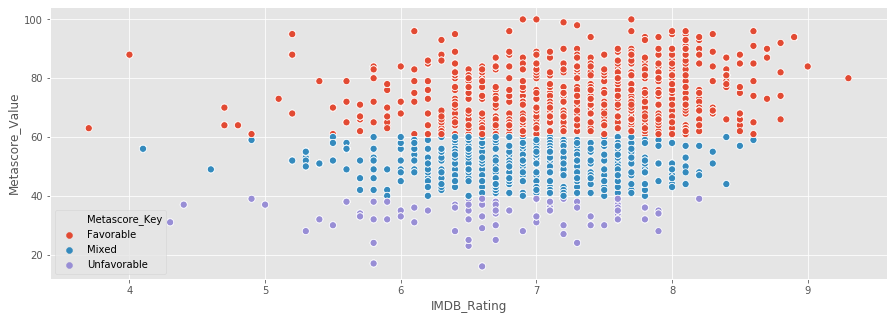

In [65]:
#Finding The Correlation Between Metascore_Value and IMDB_Rating
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

plt.figure(figsize=(15,5))
sns.scatterplot(x="IMDB_Rating", y="Metascore_Value", hue="Metascore_Key", s = 50,
                     data=Model_DF_Temp);